# Final Project Part 2

## Import Libraries

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

## Set Path And Load Data

In [2]:
loan_path = Path('loan.csv')
loans = pd.read_csv(loan_path)
loans.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loans.shape

(887379, 74)

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [8]:
loans.loc[:,'term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [18]:
loans.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299271,11,6,3,103,10,2,...,63144,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [20]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_num
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000,887379.0
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307,36.0
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067,0.0
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,36.0
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000,36.0
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000,36.0
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000,36.0
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000,36.0


In [13]:
loans.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [14]:
loans.loc[:,'open_rv_12m'].value_counts()

0.0     7073
1.0     6415
2.0     3955
3.0     2125
4.0      962
5.0      420
6.0      204
7.0      103
8.0       50
10.0      24
9.0       21
12.0       7
11.0       6
15.0       2
14.0       2
19.0       1
22.0       1
16.0       1
Name: open_rv_12m, dtype: int64

In [28]:
loans.loc[:,'title'].value_counts()

Debt consolidation                         414001
Credit card refinancing                    164331
Home improvement                            40112
Other                                       31892
Debt Consolidation                          15760
Major purchase                              12051
Business                                     6728
Medical expenses                             6674
Car financing                                5565
Consolidation                                5381
debt consolidation                           4834
Moving and relocation                        3921
Vacation                                     3805
Debt Consolidation Loan                      3804
Home buying                                  2365
Credit Card Consolidation                    2359
consolidation                                2174
Personal Loan                                2133
Consolidation Loan                           1778
Home Improvement                             1772


In [36]:
loans.corr().loc[:,'mths_since_last_delinq']

id                            -0.008540
member_id                     -0.008682
loan_amnt                     -0.038080
funded_amnt                   -0.038117
funded_amnt_inv               -0.035778
int_rate                      -0.030033
installment                   -0.041391
annual_inc                    -0.050350
dti                            0.001447
delinq_2yrs                   -0.562654
inq_last_6mths                 0.014748
mths_since_last_delinq         1.000000
mths_since_last_record         0.019038
open_acc                      -0.043182
pub_rec                        0.096646
revol_bal                     -0.026798
revol_util                     0.012644
total_acc                     -0.044920
out_prncp                     -0.036634
out_prncp_inv                 -0.036619
total_pymnt                   -0.007480
total_pymnt_inv               -0.005094
total_rec_prncp                0.000654
total_rec_int                 -0.028208
total_rec_late_fee            -0.021321


In [38]:
loans.corr().loc[:,'tot_coll_amt']

id                             0.004260
member_id                      0.004292
loan_amnt                     -0.004275
funded_amnt                   -0.004275
funded_amnt_inv               -0.004274
int_rate                       0.001130
installment                   -0.003526
annual_inc                     0.001096
dti                           -0.002084
delinq_2yrs                    0.000207
inq_last_6mths                 0.003171
mths_since_last_delinq         0.006466
mths_since_last_record        -0.059586
open_acc                       0.000124
pub_rec                        0.006891
revol_bal                     -0.006219
revol_util                    -0.009513
total_acc                      0.006525
out_prncp                     -0.000835
out_prncp_inv                 -0.000836
total_pymnt                   -0.004266
total_pymnt_inv               -0.004265
total_rec_prncp               -0.003844
total_rec_int                 -0.003613
total_rec_late_fee            -0.000501


In [39]:
loans.corr().loc[:,'mths_since_last_major_derog']

id                             0.056046
member_id                      0.056087
loan_amnt                     -0.037278
funded_amnt                   -0.037271
funded_amnt_inv               -0.037235
int_rate                      -0.011180
installment                   -0.039111
annual_inc                    -0.037394
dti                            0.007736
delinq_2yrs                   -0.424556
inq_last_6mths                 0.020546
mths_since_last_delinq         0.699356
mths_since_last_record         0.034511
open_acc                       0.009059
pub_rec                        0.114771
revol_bal                     -0.019765
revol_util                    -0.012984
total_acc                     -0.047398
out_prncp                      0.003872
out_prncp_inv                  0.003886
total_pymnt                   -0.058472
total_pymnt_inv               -0.058445
total_rec_prncp               -0.050309
total_rec_int                 -0.056786
total_rec_late_fee            -0.010711


In [3]:
loans.loc[:,'loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [6]:
loans.loc[loans.loc[:,'loan_status'] == 'Current','mths_since_last_major_derog'].value_counts()

42.0     2557
45.0     2554
44.0     2521
46.0     2520
40.0     2496
48.0     2486
38.0     2477
43.0     2459
58.0     2420
39.0     2408
47.0     2402
37.0     2396
64.0     2391
41.0     2390
49.0     2386
56.0     2386
29.0     2371
26.0     2347
36.0     2339
66.0     2337
60.0     2331
34.0     2331
59.0     2322
28.0     2320
35.0     2319
33.0     2319
67.0     2318
31.0     2315
57.0     2313
70.0     2307
         ... 
141.0      17
137.0      16
146.0      16
143.0      15
139.0      15
136.0      14
148.0      13
149.0      10
142.0       9
140.0       8
145.0       8
144.0       7
147.0       7
151.0       6
152.0       4
153.0       4
170.0       3
150.0       3
154.0       2
188.0       1
156.0       1
180.0       1
157.0       1
159.0       1
171.0       1
176.0       1
169.0       1
155.0       1
165.0       1
162.0       1
Name: mths_since_last_major_derog, Length: 167, dtype: int64

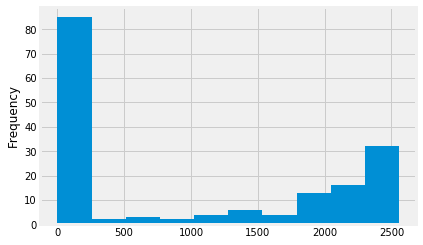

In [7]:
loans.loc[loans.loc[:,'loan_status'] == 'Current','mths_since_last_major_derog'].value_counts().plot(kind = 'hist')

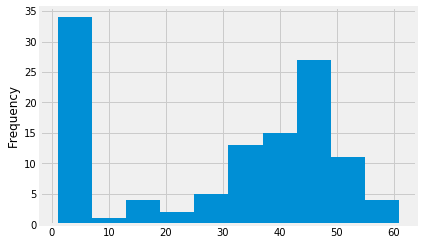

In [8]:
loans.loc[loans.loc[:,'loan_status'] == 'Late (31-120 days)','mths_since_last_major_derog'].value_counts().plot(kind = 'hist')

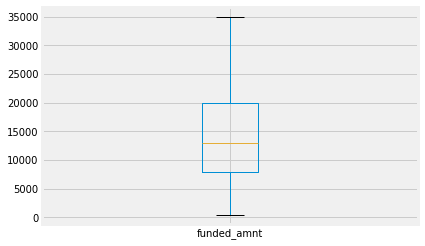

In [9]:
loans.loc[:,'funded_amnt'].plot(kind = 'box')

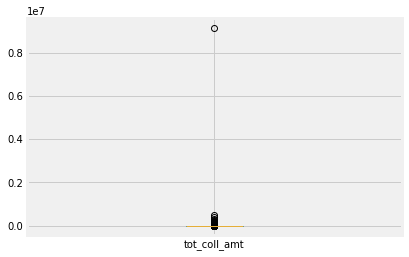

In [10]:
loans.loc[:,'tot_coll_amt'].plot(kind = 'box')

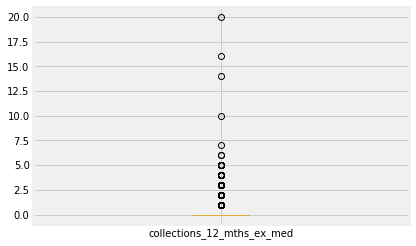

In [11]:
loans.loc[:,'collections_12_mths_ex_med'].plot(kind = 'box')

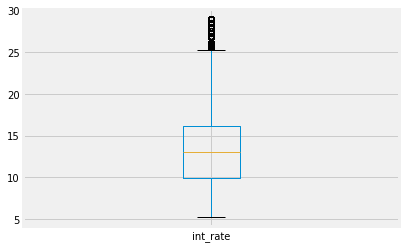

In [12]:
loans.loc[:,'int_rate'].plot(kind = 'box')

In [15]:
loans.loc[:,'loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [16]:
loans.loc[:,'Good_Status'] = loans.loan_status.isin(['Current'
                                                               ,'Fully Paid',
                                                               'Issued'
                                                               ,'Does not meet the credit policy. Status:Fully Paid']
                                                             )

In [17]:
loans.corr().loc[:,'Good_Status']

id                             0.190691
member_id                      0.190876
loan_amnt                     -0.003512
funded_amnt                   -0.002808
funded_amnt_inv               -0.000007
int_rate                      -0.175450
installment                   -0.014124
annual_inc                     0.034142
dti                           -0.009961
delinq_2yrs                   -0.002804
inq_last_6mths                -0.080892
mths_since_last_delinq         0.009779
mths_since_last_record        -0.038513
open_acc                       0.016059
pub_rec                        0.013574
revol_bal                      0.020689
revol_util                    -0.050134
total_acc                      0.017997
out_prncp                      0.158544
out_prncp_inv                  0.158540
total_pymnt                    0.042515
total_pymnt_inv                0.043552
total_rec_prncp                0.095991
total_rec_int                 -0.067069
total_rec_late_fee            -0.166320


In [18]:
loans.loc[:,'Bad_Status'] = loans.loan_status.isin(['Late (31-120 days)'
                                                               ,'Late (16-30 days)',
                                                               'Charged Off'
                                                               ,'Default'
                                                               ,'Does not meet the credit policy. Status:Charged Off']
                                                             )

In [19]:
loans.corr().loc[:,'Bad_Status']

id                            -0.201356
member_id                     -0.201594
loan_amnt                     -0.000450
funded_amnt                   -0.001233
funded_amnt_inv               -0.004262
int_rate                       0.170129
installment                    0.009762
annual_inc                    -0.036184
dti                            0.008322
delinq_2yrs                   -0.002174
inq_last_6mths                 0.082200
mths_since_last_delinq        -0.006165
mths_since_last_record         0.043935
open_acc                      -0.017776
pub_rec                       -0.015158
revol_bal                     -0.020264
revol_util                     0.046479
total_acc                     -0.019214
out_prncp                     -0.176649
out_prncp_inv                 -0.176646
total_pymnt                   -0.041756
total_pymnt_inv               -0.042951
total_rec_prncp               -0.094256
total_rec_int                  0.060332
total_rec_late_fee             0.158649


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

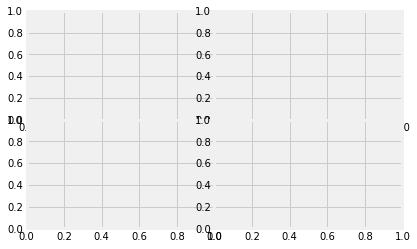

In [25]:
axes = pd.plotting.scatter_matrix(loans.loc[:, ['Bad_Status', 'int_rate']])

## shortcomings, assumptions, and next steps

Shortcomings: 
    1. This data set is huge making exploratory data analysis hard
    2. with this amount of columns and missing data it can be hard to tell what's important
    3. loan data can be multicolinear (riskier loans get high interest rates, which can lead to higher delinquency)
    4. There are a lot of things related to the current loan that we wouldn't have when predicting these loans at origination

Assumptions:
    1. I will have to make assumptions and drop some of the columns (rather than drop columns that have a ton of data missing, I'm planning on dropping data that has just a few records missing)
    2. There could be many target variables for this data set(eg. I made 2 such variables with Good_Status, and Bad_Status)


Next Steps:
    1. Decide on target variable population (or choose a couple different ones)
    2. Start looking at logistic regression, and classification models that could help with predicting status
    3. Look for data on external factors (eg. economy/GDP)

Notes: 
    1. I didn't drop any columns yet because I want to look at some basic models first to determine which columns are important predictors (correlation didn't seem to yield the best results)